In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# Description of Attributes of the Dataset

1. **Invoice id:** Computer generated sales slip invoice identification number
1. **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).
1. **City:** Location of supercenters
1.  **Customer type:** 
        Type of customers, recorded by Members for customers using member card and Normal for without member card.
1.   **Gender:**  Gender type of customer
1.     **Product line:** General item categorization groups - 
            *             Electronic accessories, 
            *             Fashion accessories, 
            *             Food and beverages, 
            *             Health and beauty, 
            *             Home and lifestyle, 
            *             Sports and travel
1.     **Unit price:** Price of each product in dollor
1.     **Quantity:** Number of products purchased by customer
1.     **Tax:** 5'%' tax fee for customer buying
1.     **Total::** Total price including tax
1.     **Date:** Date of purchase (Record available from **January 2019 to March 2019**)
1.     **Time:** Purchase time **(10am to 9pm)**
1.     **Payment:** Payment used by customer for purchase 
    (3 methods are available – **Cash, Credit card and Ewallet**)
1.     **COGS**: Cost of goods sold
1.     **Gross margin percentage:** Gross margin percentage
1.     **Gross income:** Gross income
1.     **Rating**: Customer stratification rating on their overall shopping experience (**On a scale of 1 to 10**)

# Important librarires

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set(rc={'figure.figsize':(13,9)})
import warnings
warnings.filterwarnings("ignore")

# Inspecting and loading of file in pandas

In [3]:
mkt =pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')#loading of csv file in mkt dataframe

# Shape of dataframe

In [4]:
mkt.shape

(1000, 17)

# Intial Inspection

In [5]:
mkt.head().T #checking first five rows of dataframe anf Transpose it for ease of reading

,0,1,2,3,4
Invoice ID,750-67-8428,226-31-3081,631-41-3108,123-19-1176,373-73-7910
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Unit price,74.69,15.28,46.33,58.22,86.31
Quantity,7,5,7,8,7
Tax 5%,26.1415,3.82,16.2155,23.288,30.2085
Total,548.9715,80.22,340.5255,489.048,634.3785


In [6]:
mkt.tail().T #checking last five rows of dataframe anf Transpose it for ease of reading

,995,996,997,998,999
Invoice ID,233-67-5758,303-96-2227,727-02-1313,347-56-2442,849-09-3807
Branch,C,B,A,A,A
City,Naypyitaw,Mandalay,Yangon,Yangon,Yangon
Customer type,Normal,Normal,Member,Normal,Member
Gender,Male,Female,Male,Male,Female
Product line,Health and beauty,Home and lifestyle,Food and beverages,Home and lifestyle,Fashion accessories
Unit price,40.35,97.38,31.84,65.82,88.34
Quantity,1,10,1,1,7
Tax 5%,2.0175,48.69,1.592,3.291,30.919
Total,42.3675,1022.49,33.432,69.111,649.299


In [7]:
mkt.sample(10 )

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
232,418-02-5978,B,Mandalay,Normal,Female,Health and beauty,84.09,9,37.8405,794.6505,2/11/2019,10:54,Cash,756.81,4.761905,37.8405,8.0
134,483-71-1164,C,Naypyitaw,Normal,Female,Health and beauty,81.30,6,24.3900,512.1900,3/8/2019,16:43,Ewallet,487.80,4.761905,24.3900,5.3
910,313-66-9943,B,Mandalay,Member,Female,Food and beverages,29.15,3,4.3725,91.8225,3/27/2019,20:29,Credit card,87.45,4.761905,4.3725,7.3
756,785-96-0615,B,Mandalay,Member,Female,Electronic accessories,35.74,8,14.2960,300.2160,2/17/2019,15:28,Ewallet,285.92,4.761905,14.2960,4.9
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.1750,759.6750,1/20/2019,15:55,Cash,723.50,4.761905,36.1750,5.4
587,695-28-6250,A,Yangon,Normal,Female,Sports and travel,43.06,5,10.7650,226.0650,2/4/2019,16:38,Ewallet,215.30,4.761905,10.7650,7.7
135,597-78-7908,C,Naypyitaw,Normal,Male,Fashion accessories,90.22,3,13.5330,284.1930,2/18/2019,19:39,Cash,270.66,4.761905,13.5330,6.2
302,735-06-4124,C,Naypyitaw,Normal,Male,Food and beverages,48.61,1,2.4305,51.0405,2/25/2019,15:31,Cash,48.61,4.761905,2.4305,4.4
220,239-36-3640,B,Mandalay,Normal,Male,Electronic accessories,45.35,6,13.6050,285.7050,1/31/2019,13:44,Ewallet,272.10,4.761905,13.6050,6.1
505,726-29-6793,A,Yangon,Member,Male,Electronic accessories,24.18,8,9.6720,203.1120,1/28/2019,20:54,Ewallet,193.44,4.761905,9.6720,9.8


# Basic EDA

# Checking null values

In [8]:
mkt.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

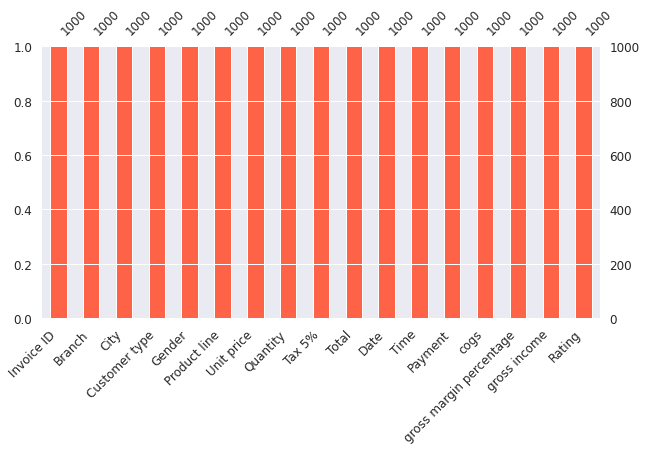

In [9]:
msno.bar(mkt,figsize=(10,5), fontsize=12, color="tomato");

# Data types of Each Attribute.

In [10]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
#Checking for wrong entries like symbols -,?,#,*,etc.
# for col in mkt.columns:
#     print('{} : {}'.format(col,mkt[col].unique()))

Observation

--------------------------
Doesn't find an odd reading.

# Unique values in each column

In [12]:
mkt.nunique( )

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [13]:
mkt.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Changing data type of features 

In [14]:
for col in[ 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment']:
    mkt[col] = mkt[col].astype('category')#coverting date itno category type

In [15]:
mkt['Date'] = pd.to_datetime(mkt['Date'])#coverting date itno datetime

<AxesSubplot:>

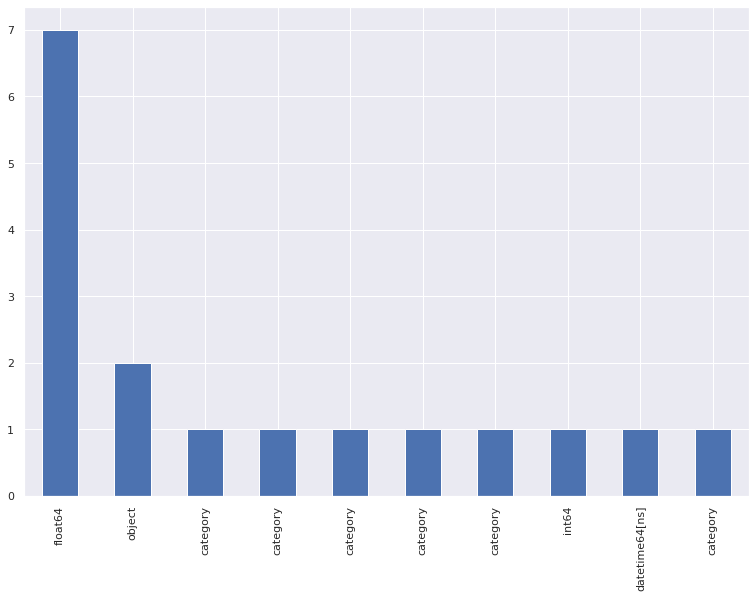

In [16]:
mkt.dtypes.value_counts().plot(kind='bar')

# Duplicated Values in dataset

In [17]:
 mkt.duplicated().sum()

0

# Statistcal Summary of Data Set

In [18]:
mkt.describe()#numerical

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [19]:
mkt.describe(include=['category','object'])#categorical

,Invoice ID,Branch,City,Customer type,Gender,Product line,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,19:48,Ewallet
freq,1,340,340,501,501,178,7,345


In [20]:
mkt.Date.describe(datetime_is_numeric=True).T#datetime

count                          1000
mean     2019-02-14 00:05:45.600000
min             2019-01-01 00:00:00
25%             2019-01-24 00:00:00
50%             2019-02-13 00:00:00
75%             2019-03-08 00:00:00
max             2019-03-30 00:00:00
Name: Date, dtype: object

# Feature Creation

In [21]:
mkt['weekday'] = mkt['Date'].dt.day_name()#creating a weakday column from Date column
mkt[['Hour', 'Minute']] = mkt['Time'].str.split(':', expand=True)#spliting a half Time column itno Hour and Minute
mkt['month'] = mkt['Date'].dt.month#creating a weakday column from Date column

# Correlations 

In [22]:
mkt.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.027387
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.014524
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.042880
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,1.000000


# Distrubution of numerical varriable

In [23]:
# df1 = mkt.select_dtypes(include=['int64','float64'])
# for i, col in enumerate(df1.columns):
#     plt.figure(i)
#     plt.figure() #this creates a new figure on which your plot will appear
#     sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=15)
#     plt.show()

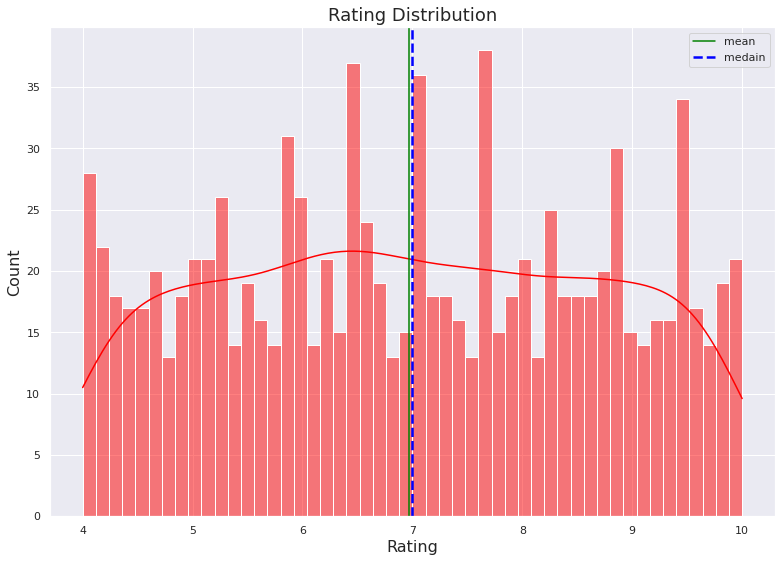

In [24]:
sns.histplot(mkt['Rating'], kde=True, color='red', bins=50)
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt.Rating.mean(),color='green',label='mean')
plt.axvline(x=mkt.Rating.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

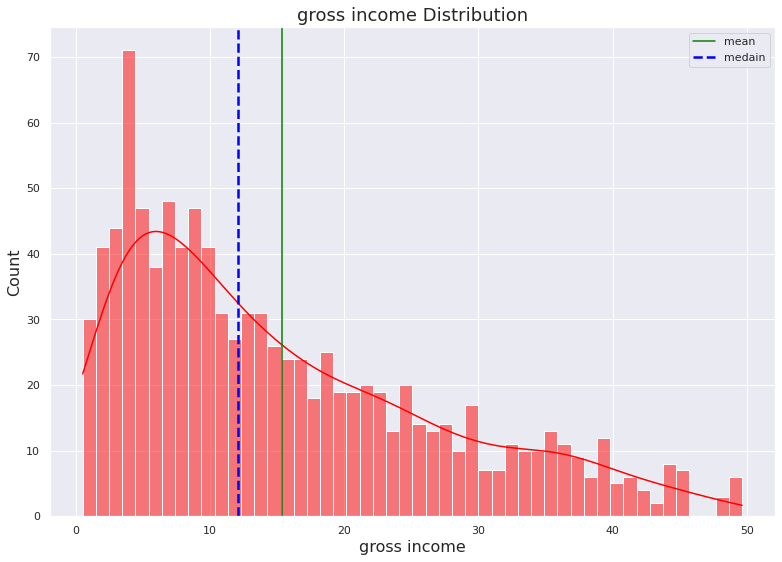

In [25]:
sns.histplot(mkt['gross income'], kde=True, color='red', bins=50)
plt.title('gross income Distribution', fontsize=18)
plt.xlabel('gross income', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt['gross income'].mean(),color='green',label='mean')
plt.axvline(x=mkt['gross income'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

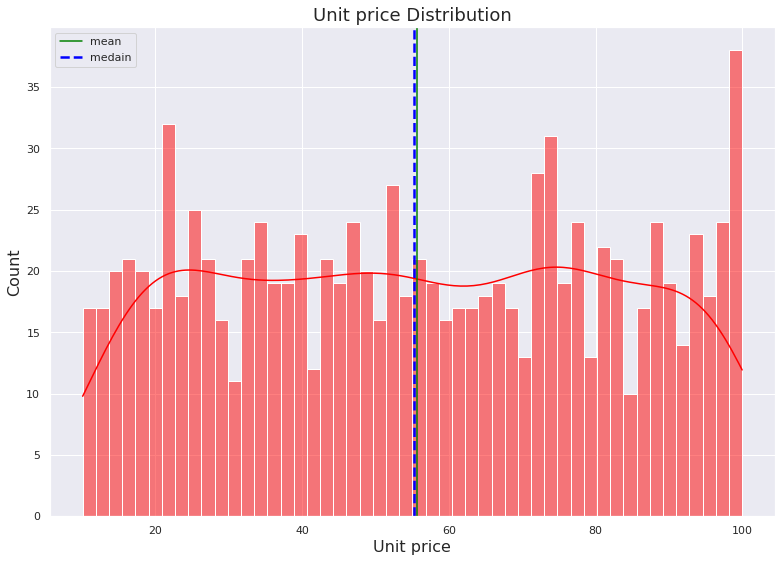

In [26]:
sns.histplot(mkt['Unit price'], kde=True, color='red', bins=50)
plt.title('Unit price Distribution', fontsize=18)
plt.xlabel('Unit price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt['Unit price'].mean(),color='green',label='mean')
plt.axvline(x=mkt['Unit price'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

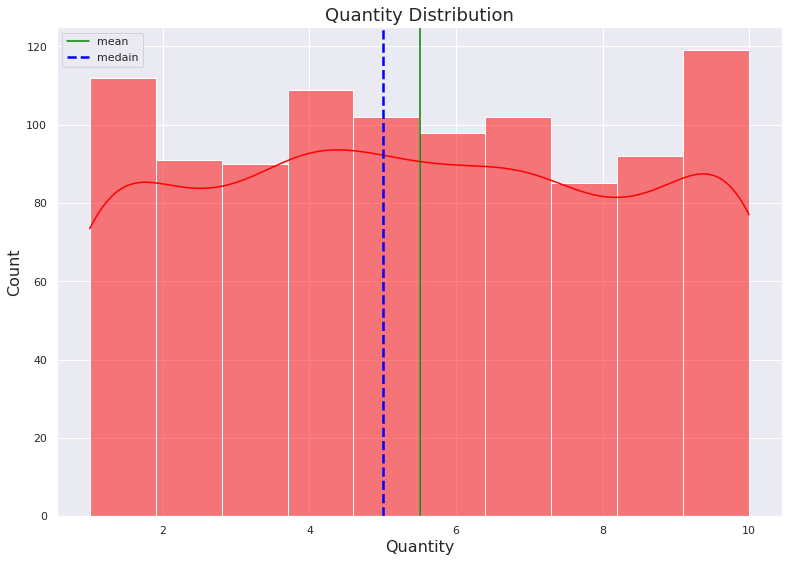

In [27]:
sns.histplot(mkt['Quantity'], kde=True, color='red', bins=10)
plt.title('Quantity Distribution', fontsize=18)
plt.xlabel('Quantity', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt['Quantity'].mean(),color='green',label='mean')
plt.axvline(x=mkt['Quantity'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

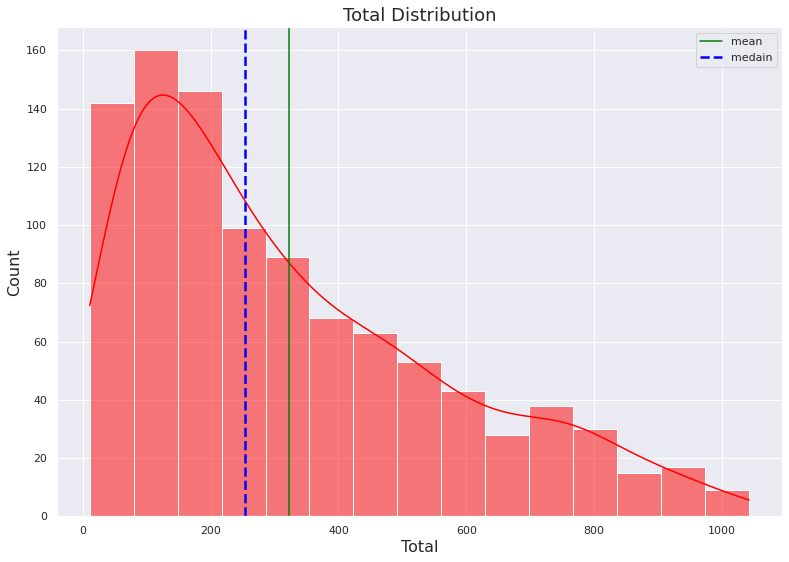

In [28]:
sns.histplot(mkt['Total'], kde=True, color='red', bins=15)
plt.title('Total Distribution', fontsize=18)
plt.xlabel('Total', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt['Total'].mean(),color='green',label='mean')
plt.axvline(x=mkt['Total'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

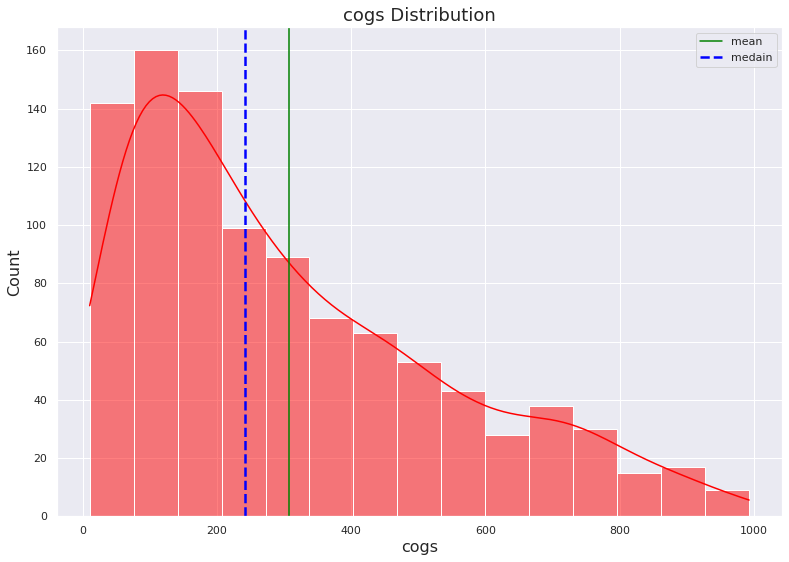

In [29]:
sns.histplot(mkt['cogs'], kde=True, color='red', bins=15)
plt.title('cogs Distribution', fontsize=18)
plt.xlabel('cogs', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt['cogs'].mean(),color='green',label='mean')
plt.axvline(x=mkt['cogs'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

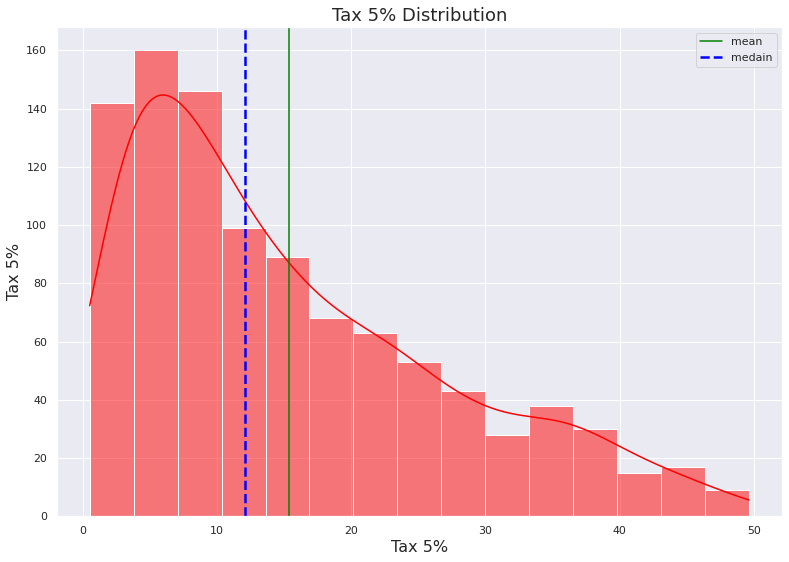

In [30]:
sns.histplot(mkt['Tax 5%'], kde=True, color='red', bins=15)
plt.title('Tax 5% Distribution', fontsize=18)
plt.xlabel('Tax 5%', fontsize=16)
plt.ylabel('Tax 5%', fontsize=16)
plt.axvline(x=mkt['Tax 5%'].mean(),color='green',label='mean')
plt.axvline(x=mkt['Tax 5%'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

# Outliers in numerical varriable

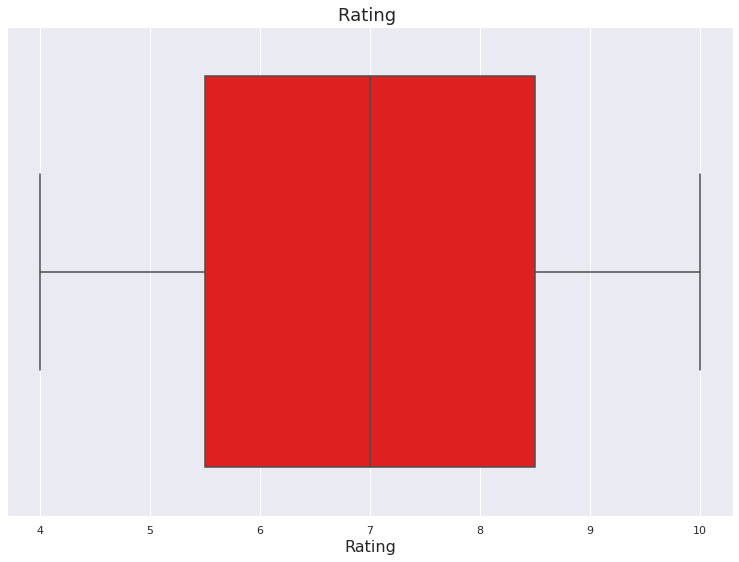

In [31]:
sns.boxplot(mkt['Rating'], color='red')
plt.title('Rating ', fontsize=18)
plt.xlabel('Rating', fontsize=16)
plt.show()

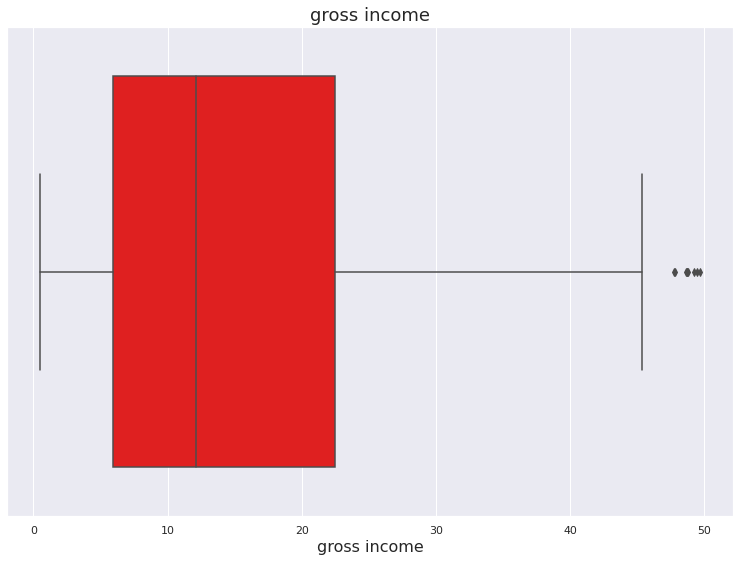

In [32]:
sns.boxplot(mkt['gross income'], color='red')
plt.title('gross income', fontsize=18)
plt.xlabel('gross income', fontsize=16)
plt.show()

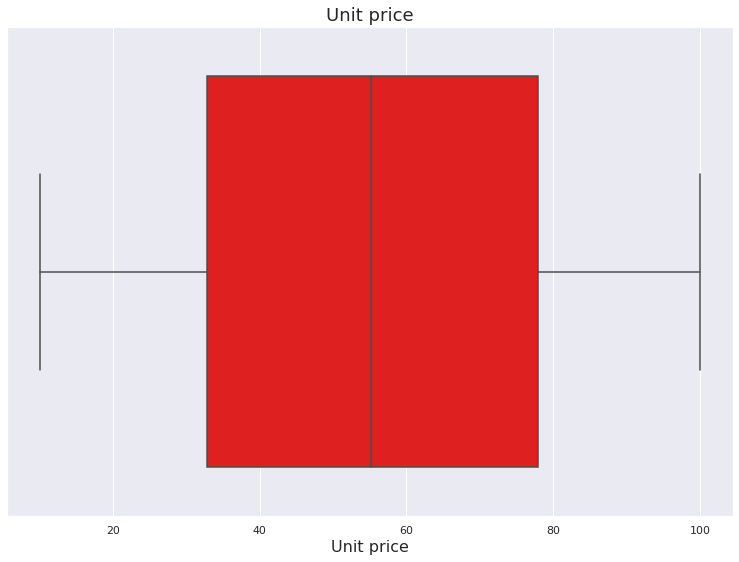

In [33]:
sns.boxplot(mkt['Unit price'], color='red')
plt.title('Unit price', fontsize=18)
plt.xlabel('Unit price', fontsize=16)
plt.show()

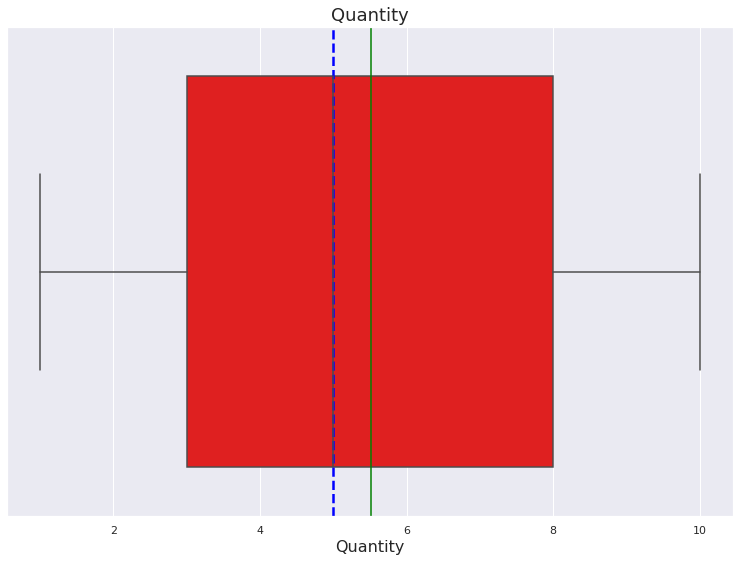

In [34]:
sns.boxplot(mkt['Quantity'], color='red')
plt.title('Quantity', fontsize=18)
plt.xlabel('Quantity', fontsize=16)
plt.axvline(x=mkt['Quantity'].mean(),color='green',label='mean')
plt.axvline(x=mkt['Quantity'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.show()

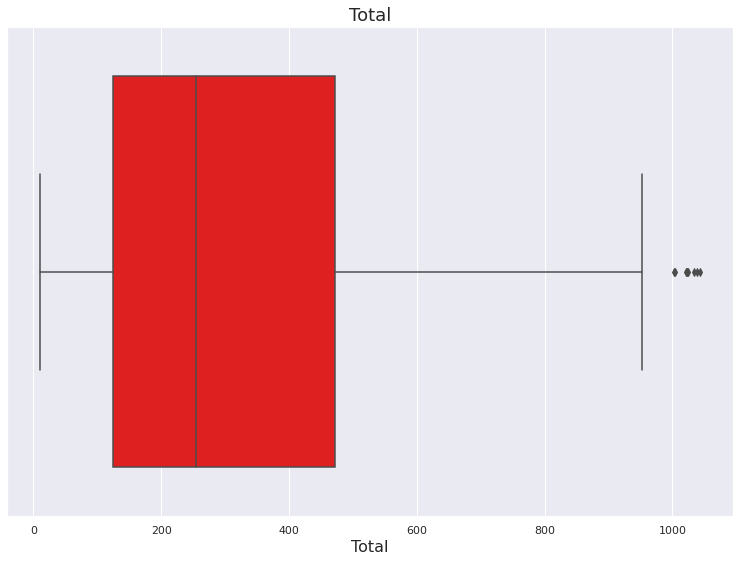

In [35]:
sns.boxplot(mkt['Total'], color='red')
plt.title('Total', fontsize=18)
plt.xlabel('Total', fontsize=16)
plt.show()

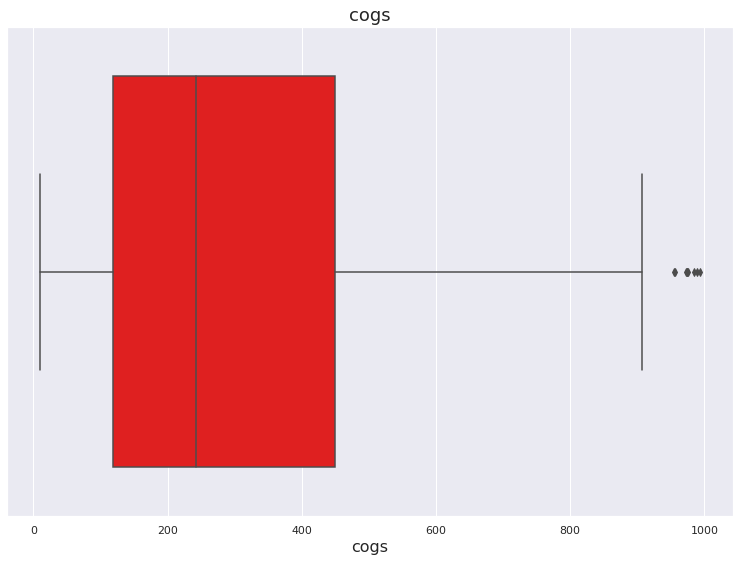

In [36]:
sns.boxplot(mkt['cogs'], color='red')
plt.title('cogs', fontsize=18)
plt.xlabel('cogs', fontsize=16)
plt.show()

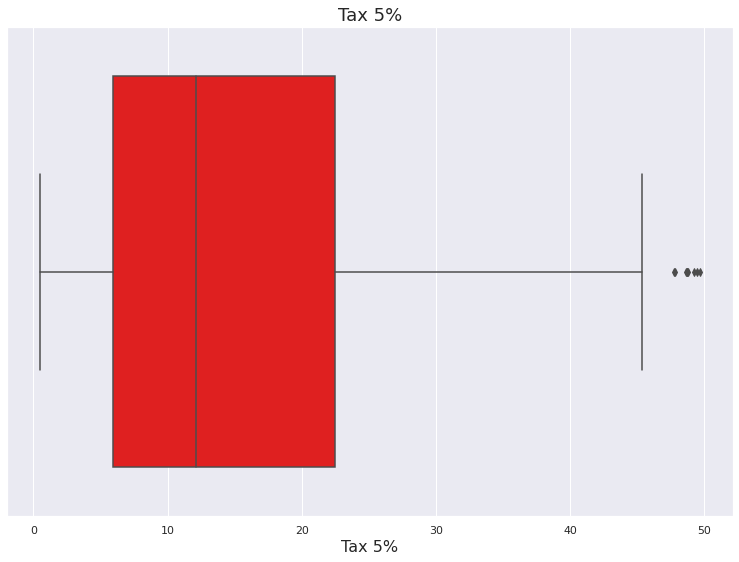

In [37]:
sns.boxplot(mkt['Tax 5%'], color='red')
plt.title('Tax 5%', fontsize=18)
plt.xlabel('Tax 5%', fontsize=16)
plt.show()

# Is your supermarket more popular with males or females?

## On basis of Gender Count

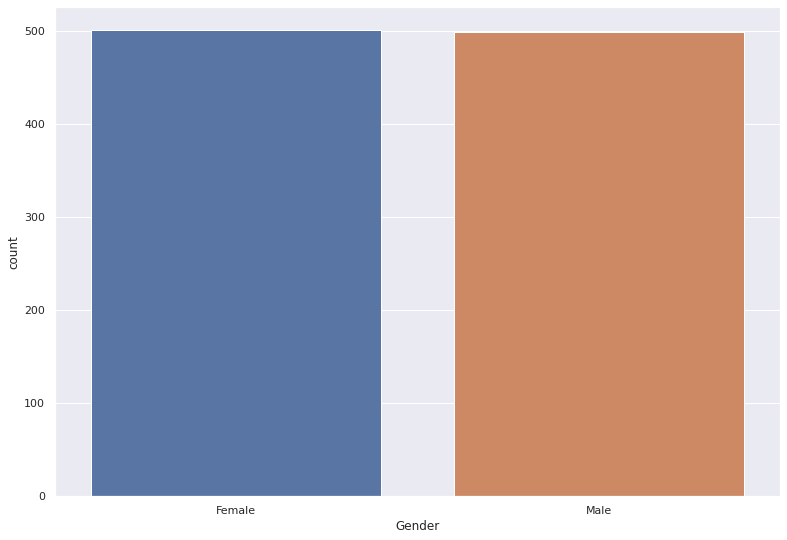

In [38]:
sns.countplot(x="Gender", data=mkt);

## On basis of rating given by different Gender

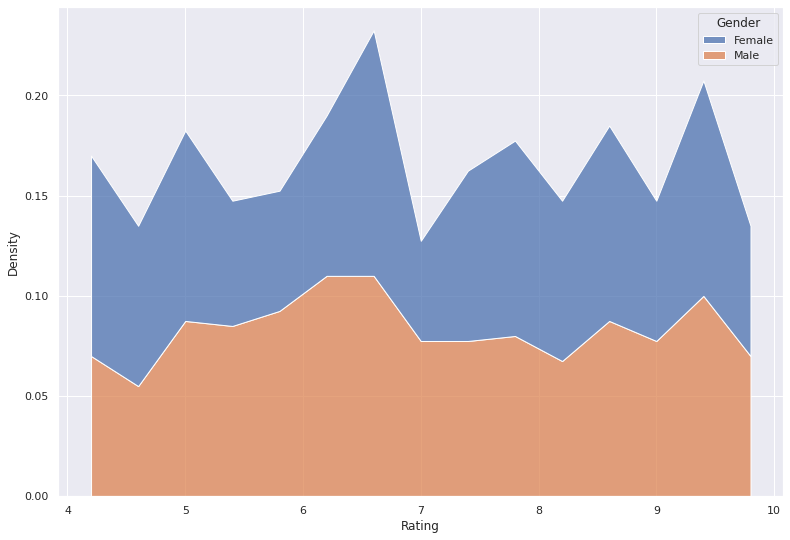

In [39]:
sns.histplot(data=mkt, x="Rating", hue="Gender", multiple="stack",element="poly",stat="density",bins=15);

# What does the customer rating look like and can you also comment on its skewness?

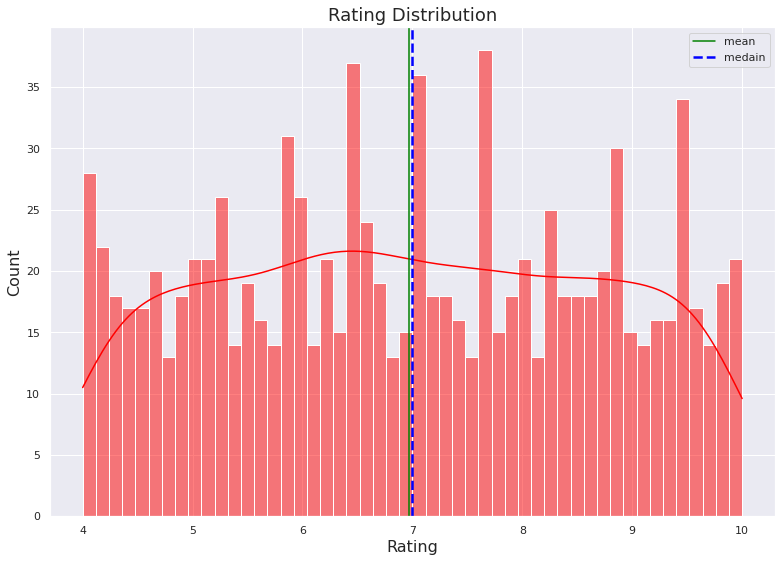

In [40]:
sns.histplot(mkt['Rating'], kde=True, color='red', bins=50)
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=mkt.Rating.mean(),color='green',label='mean')
plt.axvline(x=mkt.Rating.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()
plt.show()

In [41]:
mkt.Rating.skew()

0.00900964876573073

Observation

-----------------------------------
 1. Equally distributed
 2. no skewness
     - mean and mode are equall
     - skewness value is also low

# What can you say about the aggregate sales across the branches?

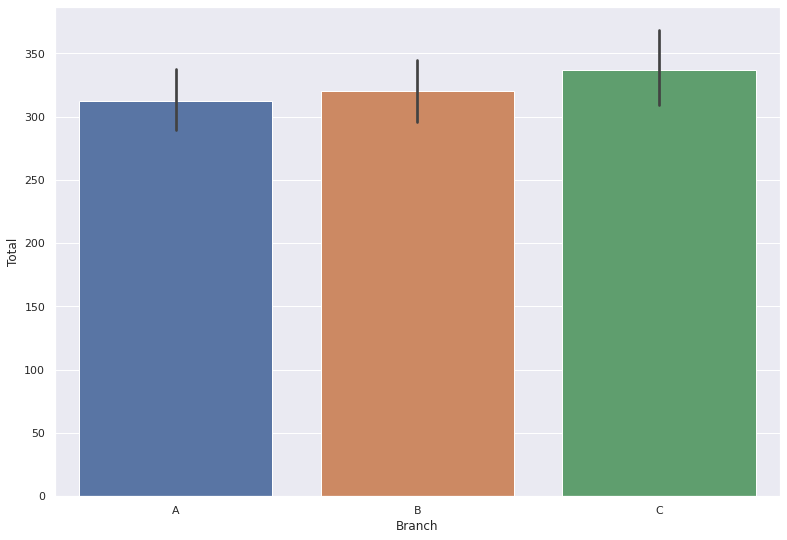

In [42]:
sns.barplot(x="Branch", y="Total", data=mkt);

Observation

----------------------------

1. Branch C is clear winner
2. Branch A is lagging behind

# Which is the most popular payment method used by customers?

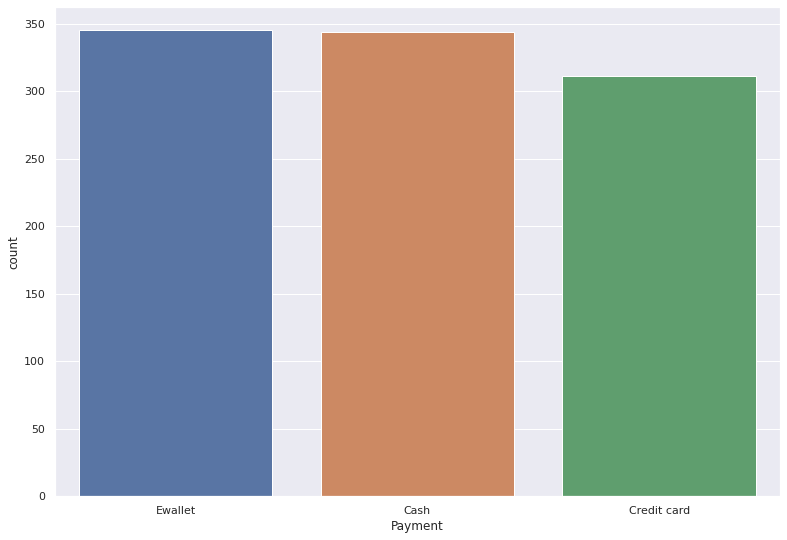

In [43]:
sns.countplot(x="Payment", data=mkt,order = mkt['Payment'].value_counts().index);

Observation

-----------------------

- E-wallet and cash payment both are popular among customers.

# Does gross income affect customer ratings?

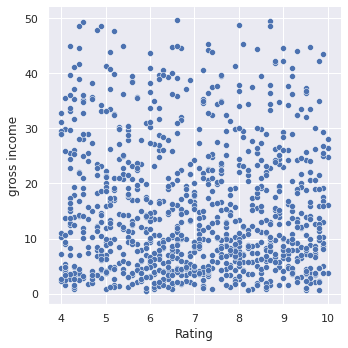

In [44]:
sns.relplot(data=mkt, y="gross income", x="Rating",ci=None);

# Which is the most profitable branch?

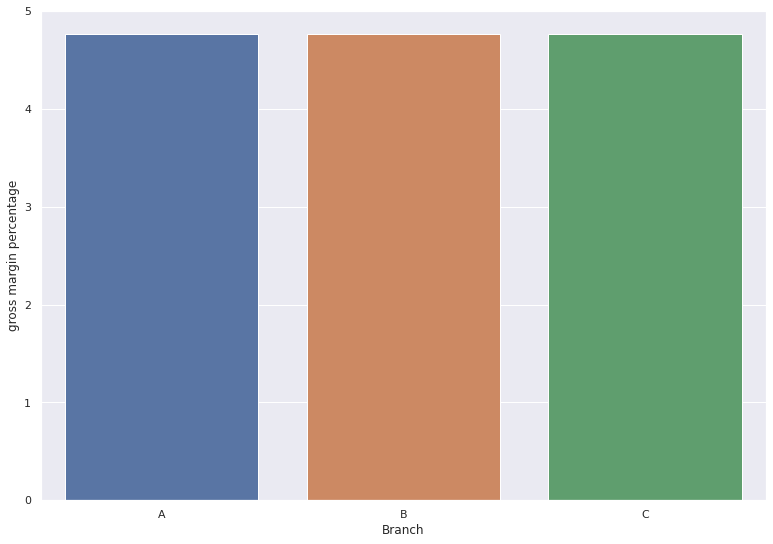

In [45]:
sns.barplot(x="Branch", y="gross margin percentage", data=mkt);

# How is the relationship between Gender and Gross income?

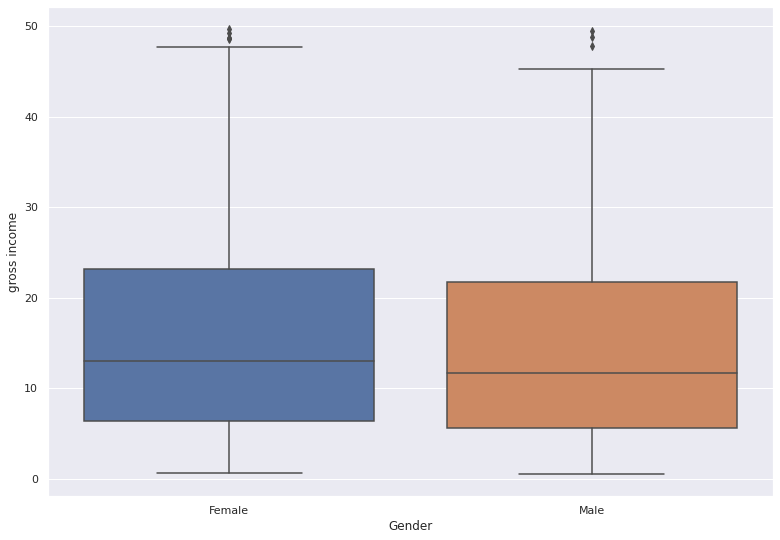

In [46]:
sns.boxplot(data=mkt, y="gross income", x="Gender");

Observation 

--------------------

- stores earning more from female cutomers

# Can you see any time trend in gross income? (time series)

In [47]:
# gross_time = mkt[['gross income', 'Date']].copy()
# gross_time.info()
# gross_time=gross_time.set_index(['Date'])

<AxesSubplot:xlabel='Date', ylabel='gross income'>

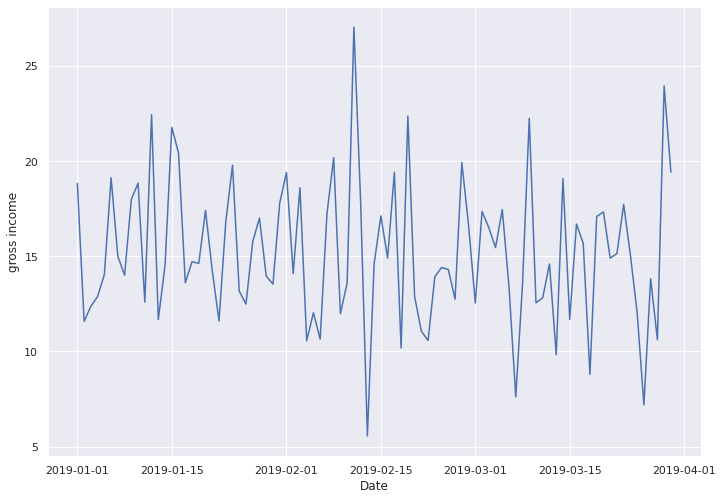

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="Date", y="gross income",
             data=mkt,ci=None)

In [49]:
# gross_time.plot(grid=True)

In [50]:
# plt.rcParams["figure.figsize"] = (20,10)
# from datetime import datetime
# start_date=datetime(2019,1,1)
# end_date=datetime(2019,4,1)
# gross_time[(start_date<=gross_time.index)&(gross_time.index<=end_date)].plot(grid=True)

In [51]:
# import statsmodels.api as sm
# decompose = sm.tsa.seasonal_decompose(gross_time,model="additve")
# decompose.plot()

In [52]:
# import statsmodels.api as sm


# res = sm.tsa.seasonal_decompose(gross_time)
# resplot = res.plot()

# Which product line helps you generate the most income?

In [53]:
mkt.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'weekday', 'Hour', 'Minute', 'month'],
      dtype='object')

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

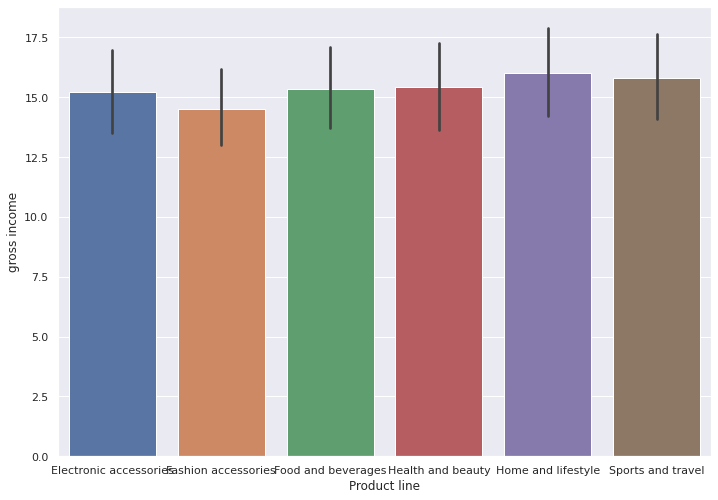

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="Product line", y="gross income",data=mkt)

# What is the spending pattern of both males and females, meaning in which category do they spend more?

<AxesSubplot:xlabel='Product line', ylabel='Total'>

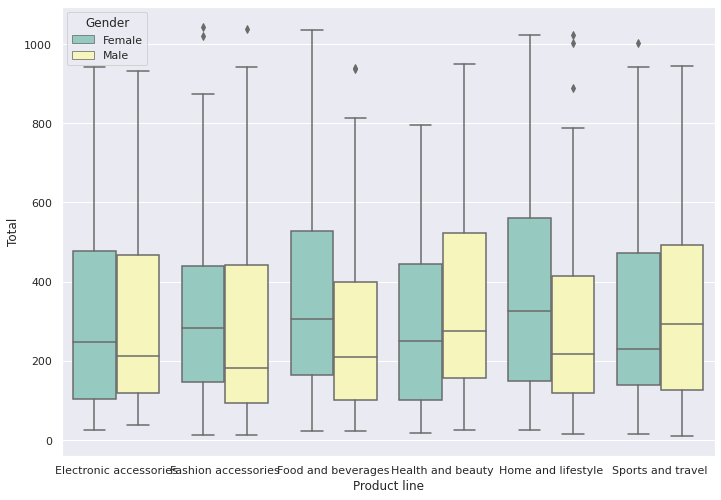

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Product line", y="Total", hue="Gender",
                 data=mkt, palette="Set3")

# How many products are bought by customers?

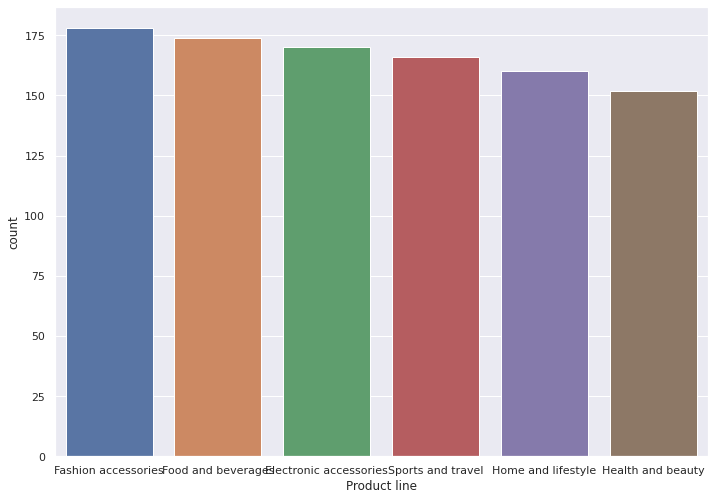

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Product line", data=mkt,order = mkt['Product line'].value_counts().index);

# Which day of the week has maximum sales?

In [57]:
mkt.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'weekday', 'Hour', 'Minute', 'month'],
      dtype='object')

<AxesSubplot:xlabel='weekday', ylabel='Total'>

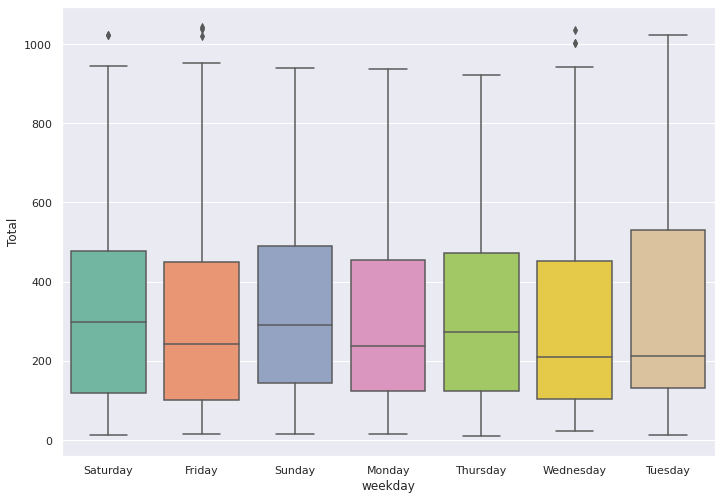

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="weekday", y="Total", data=mkt, palette="Set2")

# Which hour of the day is busiest?

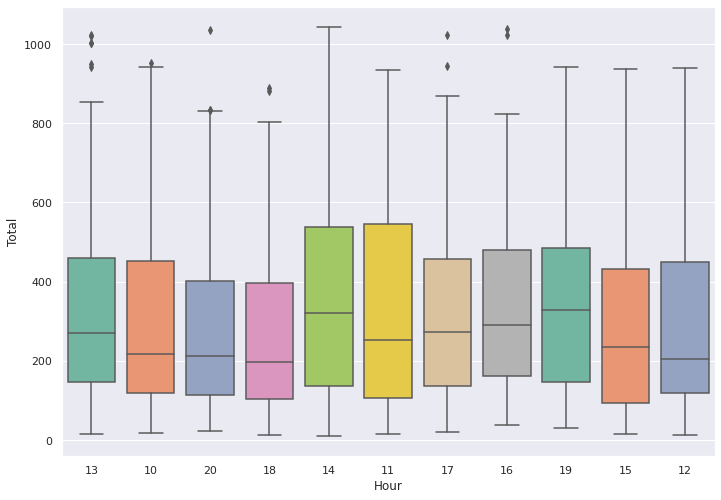

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Hour", y="Total", data=mkt, palette="Set2");

# Which product line should your supermarket focus on?

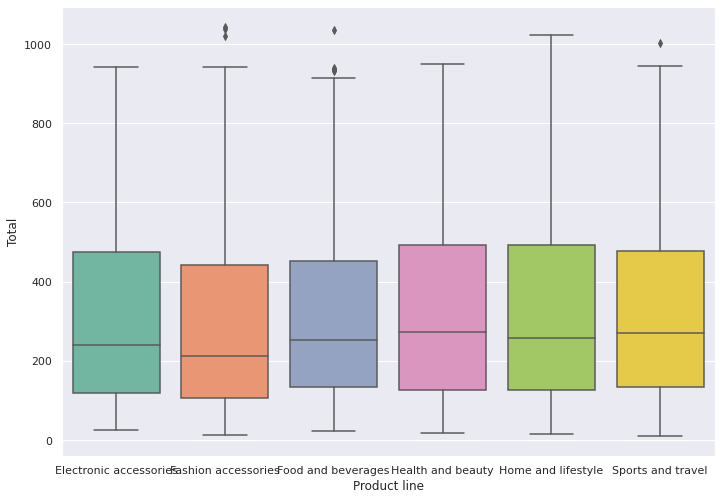

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Product line", y="Total", data=mkt, palette="Set2");

<AxesSubplot:xlabel='month', ylabel='Total'>

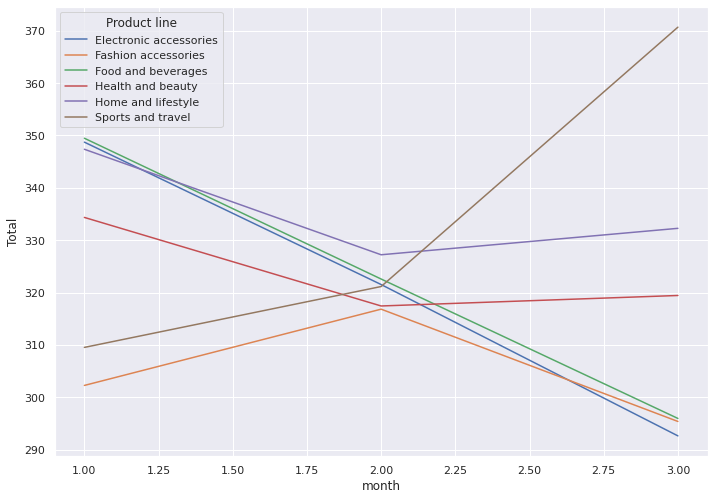

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=mkt, x="month", y="Total",ci=None, hue="Product line")

# Which city should be chosen for expansion and what products should be focussed on? 

- (gross amrgin precentage , time series with date)

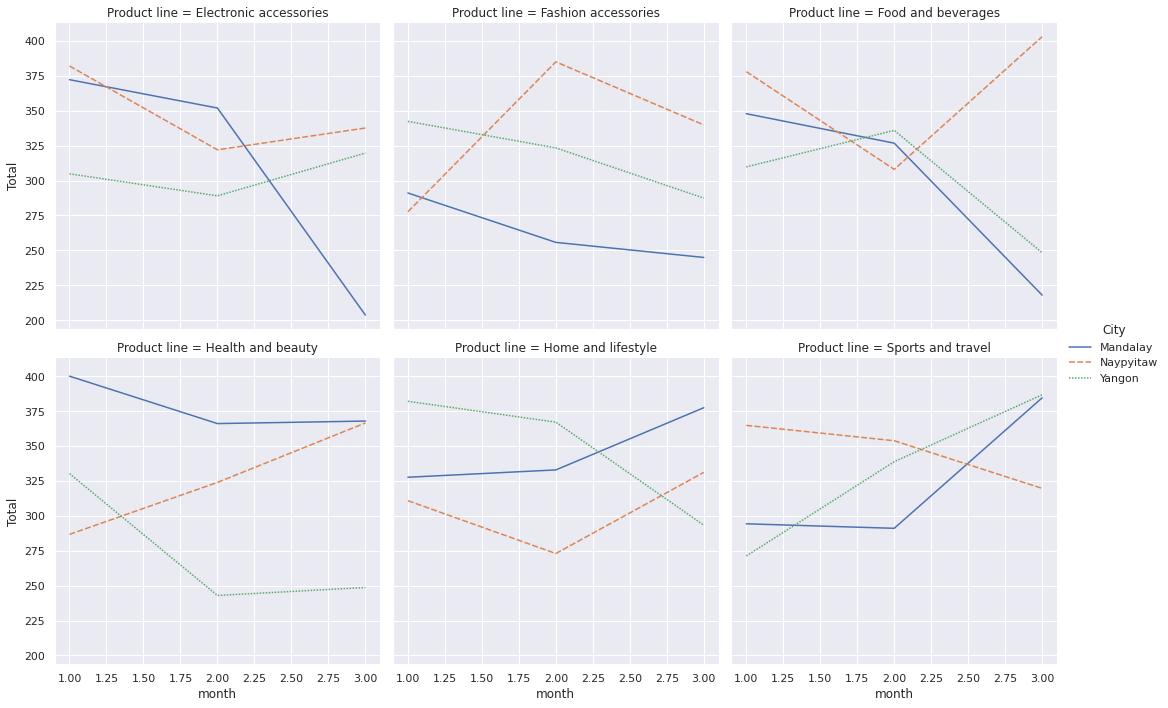

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(data=mkt, x="month", y="Total",ci=None, hue="City",col="Product line",kind="line",style="City",col_wrap=3)